In [1]:
from plotting_functions import *
from chain_functions import *
import matplotlib.pyplot as plt
from gerrychain import Graph, Partition
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import math

In [2]:
%load_ext autoreload
%autoreload 2

In [75]:
rachel = Graph.from_file("/Users/gabe/Downloads/WI_VRA18/", ignore_errors=True)

/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:261: UserWarning: Found islands (degree-0 nodes). Indices of islands: {1518, 63}
  warnings.warn(
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:295: UserWarning: NA values found in column LG18P_KOBE!
  warnings.warn("NA values found in column {}!".format(column))
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:295: UserWarning: NA values found in column LG18P_BARN!
  warnings.warn("NA values found in column {}!".format(column))
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packa

In [80]:
rachel.to_json("/Users/gabe/Downloads/WI_VRA18.json")

In [4]:
state = "PA"
plan_mvs = pd.read_csv(f"outputs/{state}/{state}_mean_var_stats.csv", index_col=0)
df = pd.read_csv(f"outputs/{state}/{state}_disprop_scores_100000.csv")
variances, means = find_variances_and_means(df)

100%|█████████████████████████████████| 100000/100000 [00:20<00:00, 4813.22it/s]


In [59]:
def make_xy_jitter(scale=1000):
    x_jitter = np.random.random() / scale
    y_jitter = np.random.random() / scale
    if np.random.random() < 0.5:
        x_jitter *= -1
    if np.random.random() < 0.5:
        y_jitter *= -1
    return x_jitter, y_jitter

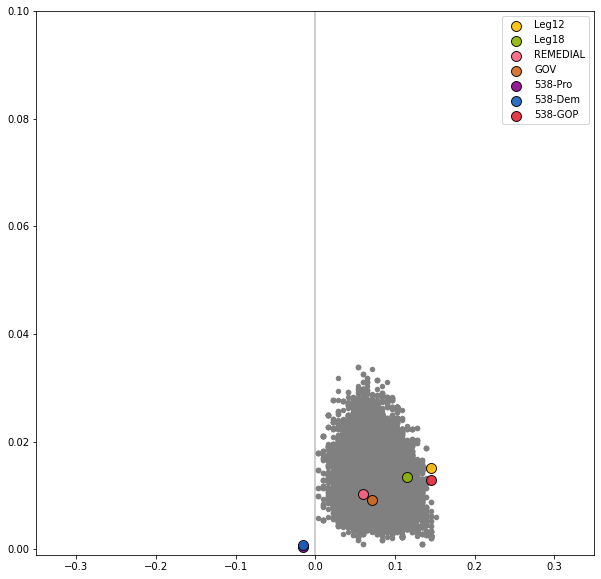

In [86]:
colors = {
    "538-Dem": '#1560BD',
    "538-GOP": '#E32636',
    "538-Pro": '#8B008B'
    }

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(means, variances, color='gray', s=20)

yellow_colors = ['#FB607F', '#FFBF00', '#8DB600', '#D2691E']
for plan in plan_mvs.index:
    nice_name = plan_names[state][plan]
    if nice_name in colors:
        color = colors[nice_name]
    else:
        color = random.choice(yellow_colors)
        yellow_colors.remove(color)
    mean = plan_mvs.loc[plan]['disprop_mean']
    var = plan_mvs.loc[plan]['disprop_var']
    x_jit, y_jit = make_xy_jitter()
    plt.scatter(mean, var + y_jit, label=nice_name, color=color, s=100, edgecolors='black', alpha=0.9)

ax.set_xlim(-0.35, 0.35)
ax.set_ylim(-0.001, 0.1)
plt.axvline(0, color='gray', alpha=0.5)
_ = plt.legend()

In [3]:
from gerrychain import Graph, Partition

In [5]:
rachel_g = Graph.from_file("/Users/gabe/Downloads/WI_VRA18", ignore_errors=True)

/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:261: UserWarning: Found islands (degree-0 nodes). Indices of islands: {1518, 63}
  warnings.warn(
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:295: UserWarning: NA values found in column LG18P_KOBE!
  warnings.warn("NA values found in column {}!".format(column))
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:295: UserWarning: NA values found in column LG18P_BARN!
  warnings.warn("NA values found in column {}!".format(column))
/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packa

In [6]:
old_g = Graph.from_json("old_shapes/WI.json")
new_g = Graph.from_json("shapes/WI.json")

/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:261: UserWarning: Found islands (degree-0 nodes). Indices of islands: {1395, 63}
  warnings.warn(


In [16]:
cols = [("GOVR18", "GOV18R"),
        ("GOVD18", "GOV18D"),
        ("SOSR18", "SOS18R"),
        ("SOSD18", "SOS18D"),
        ("TRESR18", "TRE18R"),
        ("TRESD18", "TRE18D")
       ]
        
bad_nodes = set()
for n in old_g.nodes:
    for col in cols:
        if rachel_g.nodes[n][col[0]] == old_g.nodes[n][col[1]]:
            continue
        else:
            bad_nodes.add(n)
            # print(rachel_g.nodes[n][col[0]], old_g.nodes[n][col[1]])

In [23]:
len(bad_nodes) / len(old_g)

0.23523594235659792

In [26]:
sum(old_g.nodes[n]["SOS18R"] for n in old_g)

1235034

In [27]:
sum(rachel_g.nodes[n]["SOSR18"] for n in old_g)

1235034.0

In [21]:
old_g.nodes[252]

{'boundary_node': True,
 'boundary_perim': 1757.988614064332,
 'area': 7034355.379800737,
 'TOTPOP': 3119.0,
 'NH_WHITE': 2560.0,
 'NH_BLACK': 159.0,
 'NH_AMIN': 92.0,
 'NH_ASIAN': 65.0,
 'NH_NHPI': 6.0,
 'NH_OTHER': 3.0,
 'NH_2MORE': 41.0,
 'HISP': 193.0,
 'H_WHITE': 58.0,
 'H_BLACK': 1.0,
 'H_AMIN': 0.0,
 'H_ASIAN': 0.0,
 'H_NHPI': 0.0,
 'H_OTHER': 128.0,
 'H_2MORE': 6.0,
 'VAP': 2775.0,
 'HVAP': 143.0,
 'WVAP': 2322.0,
 'BVAP': 141.0,
 'AMINVAP': 88.0,
 'ASIANVAP': 59.0,
 'NHPIVAP': 1.0,
 'OTHERVAP': 2.0,
 '2MOREVAP': 19.0,
 'COUNTYFP': '55009',
 'COUNTY': 'Brown',
 'Precinct': 'Green Bay - C 0003',
 'HDIST': '88',
 'SEND': '30',
 'CD': '8',
 'GOV18R': 555,
 'GOV18D': 855,
 'SOS18R': 556,
 'SOS18D': 861,
 'TRE18R': 530,
 'TRE18D': 853,
 'USH18R': 656,
 'USH18D': 778,
 'SEN18R': 522,
 'SEN18D': 928,
 'AG18R': 580,
 'AG18D': 822,
 'SH18D': 853,
 'SH18R': 571,
 'SSEN18R': 0,
 'SSEN18D': 0,
 'PRES16D': 900,
 'PRES16R': 675,
 'USH16D': 797,
 'USH16R': 845,
 'SEN16D': 864,
 'SEN16R': 776,

In [20]:
rachel_g.nodes[252]

{'boundary_node': False,
 'area': 56014807.38070753,
 'FID': 253,
 'GEOID': '55019501750001',
 'COUNTYFP': '55019',
 'COUNTY': 'Clark',
 'NAME': 'Mayville',
 'DISTRICT': '69',
 'POP': 332,
 'VAP': 242,
 'WHITE': 295,
 'BLACK': 2,
 'HISPANIC': 34,
 'ASIAN': 0,
 'AMIN': 1,
 'NHPI': 0,
 'OTHER': 0,
 'OTHERMLT': 0,
 'WHITE18': 218,
 'BLACK18': 1,
 'HISPANIC18': 22,
 'ASIAN18': 0,
 'AMIN18': 1,
 'NHPI18': 0,
 'OTHER18': 0,
 'OTHERMLT18': 0,
 'GOVTOT18': 103.0,
 'GOVR18': 74.0,
 'GOVD18': 25.0,
 'SOSTOT18': 99.0,
 'SOSR18': 70.0,
 'SOSD18': 28.0,
 'TRESTOT18': 102.0,
 'TRESR18': 70.0,
 'TRESD18': 29.0,
 'Shape_STAr': 301109859.094,
 'Shape_STLe': 95612.33447730001,
 'SHAPE_Leng': 41222.60728799068,
 'SHAPE_Area': 56014807.380707525,
 'ID': '55019501750001',
 'LG18P_KOBE': 23.9083779648049,
 'LG18P_BARN': 41.19739862280031,
 'GOV18P_FLY': 6.040742157612854,
 'GOV18P_EVE': 35.39967482785004,
 'GOV18P_MCC': 6.168037490436114,
 'GOV18P_MIT': 8.864384085692427,
 'GOV18P_ROY': 8.818094873756696,
 

In [19]:
bad_nodes

{252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418

In [8]:
rachel_g.nodes[0]

{'boundary_node': False,
 'area': 8651834.647455135,
 'FID': 1,
 'GEOID': '55001002750001',
 'COUNTYFP': '55001',
 'COUNTY': 'Adams',
 'NAME': 'Adams',
 'DISTRICT': '41',
 'POP': 661,
 'VAP': 484,
 'WHITE': 620,
 'BLACK': 17,
 'HISPANIC': 15,
 'ASIAN': 1,
 'AMIN': 5,
 'NHPI': 0,
 'OTHER': 0,
 'OTHERMLT': 3,
 'WHITE18': 463,
 'BLACK18': 9,
 'HISPANIC18': 8,
 'ASIAN18': 1,
 'AMIN18': 3,
 'NHPI18': 0,
 'OTHER18': 0,
 'OTHERMLT18': 0,
 'GOVTOT18': 228.0,
 'GOVR18': 120.0,
 'GOVD18': 99.0,
 'SOSTOT18': 218.0,
 'SOSR18': 110.0,
 'SOSD18': 108.0,
 'TRESTOT18': 217.0,
 'TRESR18': 106.0,
 'TRESD18': 102.0,
 'Shape_STAr': 48216139.56809999,
 'Shape_STLe': 40252.052526900006,
 'SHAPE_Leng': 17048.57677931797,
 'SHAPE_Area': 8651834.647455137,
 'ID': '55001002750001',
 'LG18P_KOBE': 11.662650602409638,
 'LG18P_BARN': 20.733601070950467,
 'GOV18P_FLY': 2.591700133868808,
 'GOV18P_EVE': 19.761713520749662,
 'GOV18P_MCC': 2.591700133868808,
 'GOV18P_MIT': 2.267737617135207,
 'GOV18P_ROY': 2.915662650

In [9]:
old_g.nodes[0]

{'boundary_node': False,
 'area': 4485074.988444588,
 'TOTPOP': 661.0,
 'NH_WHITE': 620.0,
 'NH_BLACK': 12.0,
 'NH_AMIN': 3.0,
 'NH_ASIAN': 0.0,
 'NH_NHPI': 0.0,
 'NH_OTHER': 0.0,
 'NH_2MORE': 11.0,
 'HISP': 15.0,
 'H_WHITE': 4.0,
 'H_BLACK': 0.0,
 'H_AMIN': 0.0,
 'H_ASIAN': 0.0,
 'H_NHPI': 0.0,
 'H_OTHER': 10.0,
 'H_2MORE': 1.0,
 'VAP': 484.0,
 'HVAP': 8.0,
 'WVAP': 463.0,
 'BVAP': 6.0,
 'AMINVAP': 3.0,
 'ASIANVAP': 0.0,
 'NHPIVAP': 0.0,
 'OTHERVAP': 0.0,
 '2MOREVAP': 4.0,
 'COUNTYFP': '55001',
 'COUNTY': 'Adams',
 'Precinct': 'Adams - C 0001',
 'HDIST': '41',
 'SEND': '14',
 'CD': '3',
 'GOV18R': 120,
 'GOV18D': 99,
 'SOS18R': 110,
 'SOS18D': 108,
 'TRE18R': 106,
 'TRE18D': 102,
 'USH18R': 100,
 'USH18D': 120,
 'SEN18R': 103,
 'SEN18D': 119,
 'AG18R': 114,
 'AG18D': 102,
 'SH18D': 95,
 'SH18R': 125,
 'SSEN18R': 0,
 'SSEN18D': 0,
 'PRES16D': 110,
 'PRES16R': 127,
 'USH16D': 162,
 'USH16R': 0,
 'SEN16D': 111,
 'SEN16R': 116,
 'SH16D': 0,
 'SH16R': 126,
 'SSEN16D': 121,
 'SSEN16R': 106,

In [6]:
new_g

<Graph [6634 nodes, 18127 edges]>

In [13]:
old_part = Partition(old_g, "CD")
new_part = Partition(new_g, "WI_current_DIST")

In [19]:
len(new_part.cut_edges)

785

In [18]:
len(new_part.cut_edges)

785

In [21]:
old_g.nodes[0]

{'boundary_node': False,
 'area': 4485074.988444588,
 'TOTPOP': 661.0,
 'NH_WHITE': 620.0,
 'NH_BLACK': 12.0,
 'NH_AMIN': 3.0,
 'NH_ASIAN': 0.0,
 'NH_NHPI': 0.0,
 'NH_OTHER': 0.0,
 'NH_2MORE': 11.0,
 'HISP': 15.0,
 'H_WHITE': 4.0,
 'H_BLACK': 0.0,
 'H_AMIN': 0.0,
 'H_ASIAN': 0.0,
 'H_NHPI': 0.0,
 'H_OTHER': 10.0,
 'H_2MORE': 1.0,
 'VAP': 484.0,
 'HVAP': 8.0,
 'WVAP': 463.0,
 'BVAP': 6.0,
 'AMINVAP': 3.0,
 'ASIANVAP': 0.0,
 'NHPIVAP': 0.0,
 'OTHERVAP': 0.0,
 '2MOREVAP': 4.0,
 'COUNTYFP': '55001',
 'COUNTY': 'Adams',
 'Precinct': 'Adams - C 0001',
 'HDIST': '41',
 'SEND': '14',
 'CD': '3',
 'GOV18R': 120,
 'GOV18D': 99,
 'SOS18R': 110,
 'SOS18D': 108,
 'TRE18R': 106,
 'TRE18D': 102,
 'USH18R': 100,
 'USH18D': 120,
 'SEN18R': 103,
 'SEN18D': 119,
 'AG18R': 114,
 'AG18D': 102,
 'SH18D': 95,
 'SH18R': 125,
 'SSEN18R': 0,
 'SSEN18D': 0,
 'PRES16D': 110,
 'PRES16R': 127,
 'USH16D': 162,
 'USH16R': 0,
 'SEN16D': 111,
 'SEN16R': 116,
 'SH16D': 0,
 'SH16R': 126,
 'SSEN16D': 121,
 'SSEN16R': 106,

In [7]:
sum(old_g.nodes[n]["TOTPOP"] for n in old_g.nodes)

5686986.0

In [8]:
sum(new_g.nodes[n]["PERSONS"] for n in new_g.nodes)

5686986

In [9]:
new_g.nodes[0]

{'boundary_node': False,
 'area': 0.000504838797331599,
 'GEOID10': '55001002750001',
 'OBJECTID': 1,
 'NAME': 'Adams - C 1',
 'ASM': 41,
 'SEN': 14,
 'CON': 3,
 'CNTY_NAME': 'Adams',
 'PERSONS': 661,
 'WHITE': 620,
 'BLACK': 17,
 'HISPANIC': 15,
 'ASIAN': 1,
 'AMINDIAN': 5,
 'PISLAND': 0,
 'OTHER': 0,
 'OTHERMLT': 3,
 'PERSONS18': 484,
 'WHITE18': 463,
 'BLACK18': 9,
 'HISPANIC18': 8,
 'ASIAN18': 1,
 'AMINDIAN18': 3,
 'PISLAND18': 0,
 'OTHER18': 0,
 'OTHERMLT18': 0,
 'CDATOT16': 183,
 'CDADEM16': 0,
 'CDADEM216': 0,
 'CDAREP16': 0,
 'CDAIND16': 180,
 'CDASCT16': 3,
 'PRETOT16': 258,
 'PREDEM16': 110,
 'PREREP16': 127,
 'PREGRN16': 3,
 'PRELIB16': 6,
 'PRECON16': 3,
 'PREIND16': 1,
 'PREIND216': 1,
 'PREIND316': 0,
 'PREIND416': 2,
 'PREIND516': 0,
 'PREIND616': 0,
 'PREIND716': 0,
 'PREIND816': 0,
 'PREIND916': 0,
 'PREIND1016': 0,
 'PREIND1116': 0,
 'PRESCT16': 5,
 'USHTOT16': 164,
 'USHDEM16': 162,
 'USHDEM216': 0,
 'USHREP16': 0,
 'USHGRN16': 0,
 'USHLIB16': 0,
 'USHIND16': 0,
 'US

In [11]:
old_g.nodes[0]

{'boundary_node': False,
 'area': 4485074.988444588,
 'TOTPOP': 661.0,
 'NH_WHITE': 620.0,
 'NH_BLACK': 12.0,
 'NH_AMIN': 3.0,
 'NH_ASIAN': 0.0,
 'NH_NHPI': 0.0,
 'NH_OTHER': 0.0,
 'NH_2MORE': 11.0,
 'HISP': 15.0,
 'H_WHITE': 4.0,
 'H_BLACK': 0.0,
 'H_AMIN': 0.0,
 'H_ASIAN': 0.0,
 'H_NHPI': 0.0,
 'H_OTHER': 10.0,
 'H_2MORE': 1.0,
 'VAP': 484.0,
 'HVAP': 8.0,
 'WVAP': 463.0,
 'BVAP': 6.0,
 'AMINVAP': 3.0,
 'ASIANVAP': 0.0,
 'NHPIVAP': 0.0,
 'OTHERVAP': 0.0,
 '2MOREVAP': 4.0,
 'COUNTYFP': '55001',
 'COUNTY': 'Adams',
 'Precinct': 'Adams - C 0001',
 'HDIST': '41',
 'SEND': '14',
 'CD': '3',
 'GOV18R': 120,
 'GOV18D': 99,
 'SOS18R': 110,
 'SOS18D': 108,
 'TRE18R': 106,
 'TRE18D': 102,
 'USH18R': 100,
 'USH18D': 120,
 'SEN18R': 103,
 'SEN18D': 119,
 'AG18R': 114,
 'AG18D': 102,
 'SH18D': 95,
 'SH18R': 125,
 'SSEN18R': 0,
 'SSEN18D': 0,
 'PRES16D': 110,
 'PRES16R': 127,
 'USH16D': 162,
 'USH16R': 0,
 'SEN16D': 111,
 'SEN16R': 116,
 'SH16D': 0,
 'SH16R': 126,
 'SSEN16D': 121,
 'SSEN16R': 106,

100%|█████████████████████████████████| 100000/100000 [00:26<00:00, 3705.17it/s]


100%|█████████████████████████████████| 100000/100000 [00:22<00:00, 4477.21it/s]


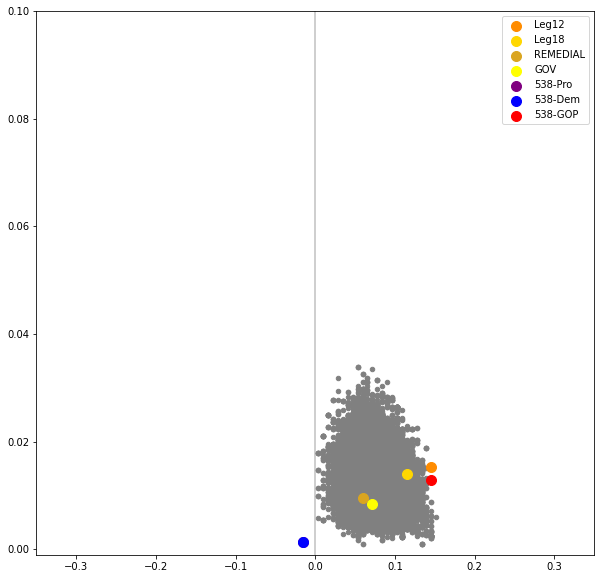

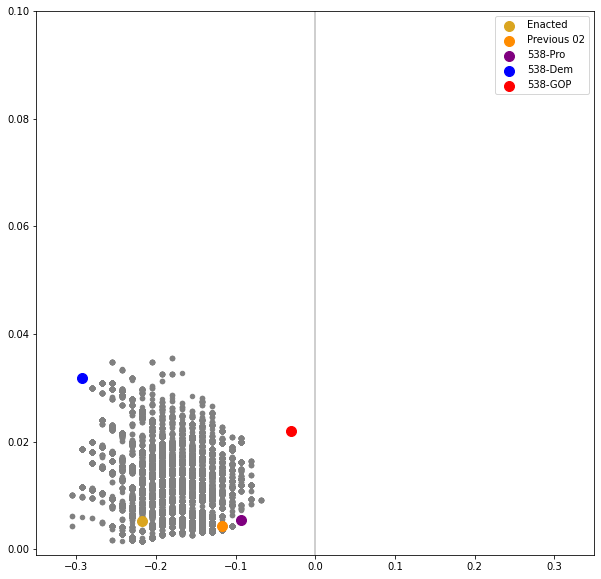

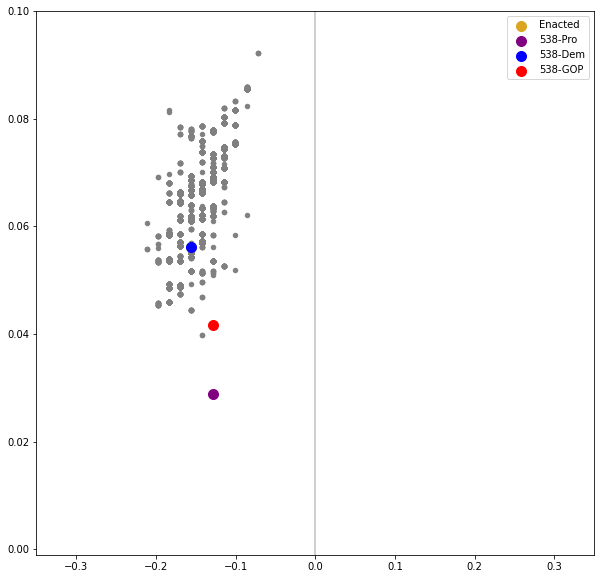

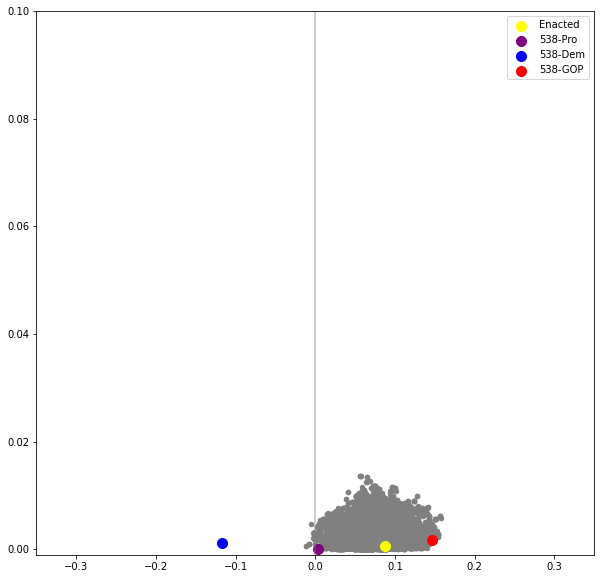

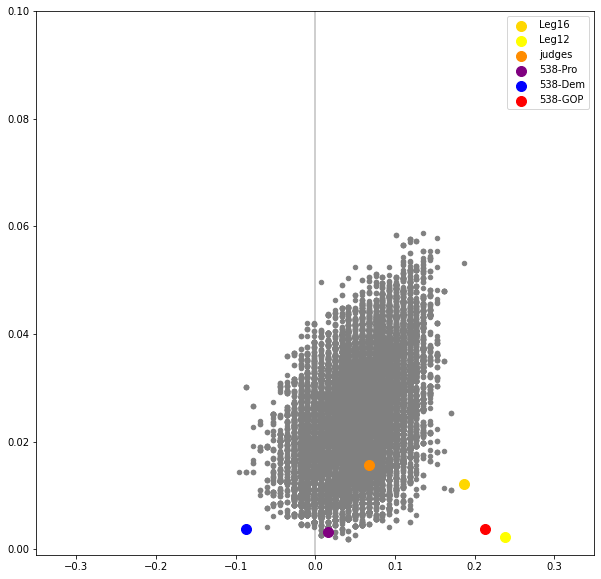

In [33]:
colors = {
    "538-Dem": 'blue',
    "538-GOP": 'red',
    "538-Pro": 'purple'
}
for state in ["PA", "MD", "MA", "TX", "NC"]:
    plan_mvs = pd.read_csv(f"outputs/{state}/{state}_mean_var_stats.csv", index_col=0)
    df = pd.read_csv(f"outputs/{state}/{state}_disprop_scores_100000.csv")
    variances, means = find_variances_and_means(df)

    fig, ax = plt.subplots(figsize=(10,10))
    plt.scatter(means, variances, color='gray', s=20)
    
    yellow_colors = ['darkorange', 'goldenrod', 'gold', 'yellow']
    for plan in plan_mvs.index:
        nice_name = plan_names[state][plan]
        if nice_name in colors:
            color = colors[nice_name]
        else:
            color = random.choice(yellow_colors)
            yellow_colors.remove(color)
        mean = plan_mvs.loc[plan]['disprop_mean']
        var = plan_mvs.loc[plan]['disprop_var']
        plt.scatter(mean, var, label=nice_name, color=color, s=100)

    ax.set_xlim(-0.35, 0.35)
    ax.set_ylim(-0.001, 0.1)
    plt.axvline(0, color='gray', alpha=0.5)
    _ = plt.legend()
    plt.savefig(f"outputs/{state}/plots/{state}_scatter.png")

In [16]:
state = "NC"
elections = states[state]['elections']
graph = initialize_graph(state)
partition = initialize_partition(graph, state, -3)

In [17]:
disprop_v = proportionality_vector(partition, elections)

In [18]:
eg_scores = []
vshares = {e:partition[e].percent("Rep") for e in elections}
sshares = {e:partition[e].wins("Rep")/len(partition) for e in elections}
for e in elections:
    eg_scores.append(sshares[e] - (2 * vshares[e]) + 0.5)

In [20]:
np.mean(eg_scores)

0.19822304197985544

In [25]:
partition["GOV08"].wins("Rep")

7

In [19]:
wi_old

<Graph [7078 nodes, 19528 edges]>

In [5]:
states = ["NC", "MA", "TX", "WI", "MD", "PA"]
state_columns = {}
for state in states:
    graph = initialize_graph(state)
    partition = initialize_partition(graph, state, -1)
    print(state, 0.07, 1/len(partition))

NC 0.07 0.07692307692307693
MA 0.07 0.1111111111111111
TX 0.07 0.027777777777777776
WI 0.07 0.125
MD 0.07 0.125
PA 0.07 0.05555555555555555


In [26]:
all_lists = [cols for cols in state_columns.values()]
# result = set(d[0]).intersection(*d[1:])
intersection = set(all_lists[0]).intersection(*all_lists[1:])

In [29]:
intersection

{'Compact_DIST',
 'Competitive_DIST',
 'Dem_DIST',
 'GOP_DIST',
 'Proportional_DIST',
 'compact_algorithm_DIST',
 'current_DIST'}

In [31]:
state_columns["MA"]

['Compact_DIST',
 'Dem_DIST',
 'Competitive_DIST',
 'compact_algorithm_DIST',
 'GOP_DIST',
 'current_DIST',
 'Proportional_DIST']

In [32]:
state_columns["NC"]

['Proportional_DIST',
 'Compact_DIST',
 'GOP_DIST',
 'Competitive_DIST',
 'MajMin_DIST',
 'Dem_DIST',
 'compact_algorithm_DIST',
 'current_DIST']

In [13]:
for state in state_columns:
    print(state, len(state_columns[state]))

NC 8
MA 7
TX 8
WI 8
MD 8
PA 8


In [6]:
nc = initialize_graph("NC")
ma = initialize_graph("MA")

/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain/graph/graph.py:261: UserWarning: Found islands (degree-0 nodes). Indices of islands: {836, 1278}
  warnings.warn(


In [7]:
nc.nodes[0].keys()

dict_keys(['boundary_node', 'area', 'ALAND10', 'AWATER10', 'VTD', 'County', 'VTD_Key', 'VTD_Name', 'PL10AA_TOT', 'PL10VA_TOT', 'EL08G_GV_D', 'EL08G_GV_R', 'EL08G_GV_L', 'EL08G_GV_T', 'EL08G_USS_', 'EL08G_US_1', 'EL08G_US_2', 'EL08G_US_3', 'EL08G_US_4', 'EL10G_USS_', 'EL10G_US_1', 'EL10G_US_2', 'EL10G_US_3', 'EL10G_US_4', 'EL12G_GV_D', 'EL12G_GV_R', 'EL12G_GV_L', 'EL12G_GV_W', 'EL12G_GV_1', 'EL12G_GV_T', 'EL14G_USS_', 'EL14G_US_1', 'EL14G_US_2', 'EL14G_US_3', 'EL14G_US_4', 'Shape_Leng', 'Shape_Area', 'EL12G_PR_D', 'EL12G_PR_R', 'EL12G_PR_L', 'EL12G_PR_W', 'EL12G_PR_1', 'EL12G_PR_T', 'EL16G_PR_R', 'EL16G_PR_D', 'EL16G_PR_L', 'EL16G_PR_W', 'EL16G_PR_T', 'EL16G_USS_', 'EL16G_US_1', 'EL16G_US_2', 'EL16G_US_3', 'EL16G_GV_D', 'EL16G_GV_R', 'EL16G_GV_L', 'EL16G_GV_T', 'BPOP', 'nBPOP', 'judge', 'newplan', 'oldplan', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP',

In [8]:
ma.nodes[0].keys()

dict_keys(['boundary_node', 'area', 'DISTRICT', 'NAME', 'Shape_Le_1', 'Shape_Area', 'TOWN', 'WARD', 'PRECINCT', 'SEN12D', 'SEN12R', 'PRES12D', 'PRES12R', 'SEN13D', 'SEN13R', 'SEN14D', 'SEN14R', 'PRES16D', 'PRES16R', 'CD', 'SEND', 'HDIST', 'NAME10', 'GOV14R', 'GOV14D', 'GOV14I', 'GOV14U1', 'GOV14U2', 'GOV18R', 'GOV18D', 'SEN18D', 'SEN18R', 'SEN18U', 'RSHARE', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'MA_Compact_DIST', 'MA_Dem_DIST', 'MA_Competitive_DIST', 'MA_compact_algorithm_DIST', 'MA_GOP_DIST', 'STATEFP', 'MA_current_DIST', 'MA_Proportional_DIST'])

proportionality ideal: S = V => disprop = S - V

EG ideal: S = 2V - 0.5 => EG score = S - 2V + 0.5

ensemble ideal: S = mean(S) => EG score = S - mean(S)

In [56]:
state = "NC"
df, _ = make_df(f"outputs/{state}/{state}_proportionality_scores_100000.csv")
seats_df = df.copy()
eg_df = df.copy()
ensemble_df = df.copy()
prop_df = df.copy()
stats = pd.read_csv(f"outputs/{state}/{state}_election_stats.csv", index_col=0)

k = int(stats.loc["seats"][0])
seat_share = dict(stats.loc["seat_share"])
vote_share = dict(stats.loc["vote_share"])
elections = list(df.columns)

# We can recreate the number of R seats in each plan by adding the vote share to the disprop score
# which was calculated as disprop = plan's seat share - election's vote share
for election in tqdm(elections):
    seats_df[election] = df[election].apply(lambda x: round((x + vote_share[election]) * k))
    
mean_seats = dict(seats_df.mean())
for election in tqdm(elections):
    eg_df[election] = seats_df[election].apply(lambda x: (x/k) - (2 * vote_share[election]) + 0.5)
    ensemble_df[election] = seats_df[election].apply(lambda x: (x/k) - (mean_seats[election]/k))
    prop_df[election] = seats_df[election].apply(lambda x: (x/k) - vote_share[election])

100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  7.12it/s]


In [65]:
eg_df.to_csv("test.csv", index=0)

In [57]:
df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,0.055499,-0.072121,0.209060,0.210554,0.258410,0.260883,0.249470,0.239007,0.269703
1,0.055499,-0.072121,0.209060,0.210554,0.258410,0.260883,0.249470,0.239007,0.269703
2,-0.021424,-0.072121,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.192780
3,-0.021424,0.004802,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.115857
4,-0.021424,0.004802,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.115857


In [58]:
prop_df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,0.055462,-0.072085,0.209031,0.210531,0.258431,0.260931,0.249431,0.239031,0.269731
1,0.055462,-0.072085,0.209031,0.210531,0.258431,0.260931,0.249431,0.239031,0.269731
2,-0.021462,-0.072085,0.132108,0.133608,0.181508,0.184008,0.172508,0.162108,0.192808
3,-0.021462,0.004838,0.132108,0.133608,0.181508,0.184008,0.172508,0.162108,0.115885
4,-0.021462,0.004838,0.132108,0.133608,0.181508,0.184008,0.172508,0.162108,0.115885


In [59]:
seats_df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,7,5,10,10,10,10,10,10,10
1,7,5,10,10,10,10,10,10,10
2,6,5,9,9,9,9,9,9,9
3,6,6,9,9,9,9,9,9,8
4,6,6,9,9,9,9,9,9,8


In [60]:
eg_df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,0.072462,-0.028785,0.148831,0.151831,0.247631,0.252631,0.229631,0.208831,0.270231
1,0.072462,-0.028785,0.148831,0.151831,0.247631,0.252631,0.229631,0.208831,0.270231
2,-0.004462,-0.028785,0.071908,0.074908,0.170708,0.175708,0.152708,0.131908,0.193308
3,-0.004462,0.048138,0.071908,0.074908,0.170708,0.175708,0.152708,0.131908,0.116385
4,-0.004462,0.048138,0.071908,0.074908,0.170708,0.175708,0.152708,0.131908,0.116385


In [61]:
ensemble_df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,0.203912,0.153542,-0.024618,0.020168,0.204753,0.182416,0.166216,0.118205,0.206431
1,0.203912,0.153542,-0.024618,0.020168,0.204753,0.182416,0.166216,0.118205,0.206431
2,0.126988,0.153542,-0.101542,-0.056755,0.127830,0.105493,0.089293,0.041282,0.129508
3,0.126988,0.230465,-0.101542,-0.056755,0.127830,0.105493,0.089293,0.041282,0.052585
4,0.126988,0.230465,-0.101542,-0.056755,0.127830,0.105493,0.089293,0.041282,0.052585


In [53]:
seats_df.head()

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,7,5,10,10,10,10,10,10,10
1,7,5,10,10,10,10,10,10,10
2,6,5,9,9,9,9,9,9,9
3,6,6,9,9,9,9,9,9,8
4,6,6,9,9,9,9,9,9,8


In [55]:
vote_share

{'GOV08': 0.483,
 'SEN08': 0.4567,
 'SEN10': 0.5602,
 'GOV12': 0.5587,
 'PRES12': 0.5108,
 'SEN14': 0.5083,
 'PRES16': 0.5198,
 'SEN16': 0.5302,
 'GOV16': 0.4995}

In [54]:
mean_seats

{'GOV08': 4.34915,
 'SEN08': 3.00396,
 'SEN10': 10.32004,
 'GOV12': 9.73782,
 'PRES12': 7.33821,
 'SEN14': 7.62859,
 'PRES16': 7.83919,
 'SEN16': 8.46334,
 'GOV16': 7.3164}

In [150]:
state = "WI"
df, _ = make_df(f"outputs/{state}/{state}_proportionality_scores_100000.csv")
variances, means = find_variances_and_means(df)
csv = pd.DataFrame(list(zip(variances, means)), columns=["variances", "means"])
csv.to_csv(f"outputs/{state}/{state}_mean_variance_100000.csv", index=0)

100%|█████████████████████████████████| 100000/100000 [00:25<00:00, 3877.83it/s]


In [3]:
# how to make the inputs for EG, ED

state = "NC"
df = pd.read_csv(f"outputs/{state}/{state}_eg_scores_100000.csv")

In [4]:
variances, means = find_variances_and_means(df)

100%|█████████████████████████████████| 100000/100000 [00:29<00:00, 3366.05it/s]


In [5]:
csv = pd.DataFrame(list(zip(variances, means)), columns=["variances", "means"])

In [6]:
csv

,variances,means
0,0.008635,0.172588
1,0.008635,0.172588
2,0.005777,0.104212
3,0.003295,0.104212
4,0.003295,0.104212
...,...,...
99995,0.021275,0.078571
99996,0.022506,0.087118
99997,0.023842,0.104212
99998,0.023842,0.104212


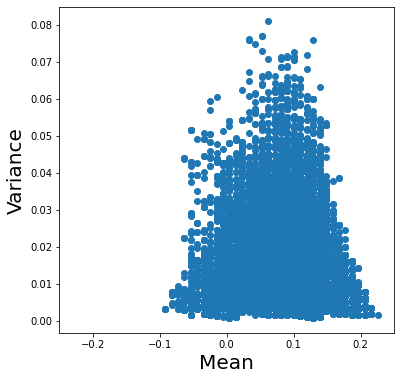

In [153]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(means, variances)
ax.set_xlabel("Mean", fontsize=20)
ax.set_ylabel("Variance", fontsize=20)

ax.set_xlim(-0.25, 0.25)
plt.savefig(f"outputs/{state}/{state}_mean_variance_scatter.png", dpi=600)

In [98]:
state = "NC"
threshold = 1/8
FTV_elections = states[state]["past4"]
df = pd.read_csv(f"outputs/{state}/{state}_proportionality_scores_100000.csv", index_col=0)
df["FTV_score"] = df[FTV_elections].apply(lambda x:abs(x) < threshold).sum(axis=1)

In [96]:
df[df.FTV_score == 3][FTV_elections].apply(lambda x:abs(x) < threshold)

,PRES16,PRES12,SEN18,SEN16
76,True,True,True,False
77,True,True,True,False
78,True,True,True,False
79,True,True,True,False
80,True,True,True,False
...,...,...,...,...
99991,False,True,True,True
99992,False,True,True,True
99993,False,True,True,True
99997,True,True,False,True


In [88]:
bools = df[df.FTV_score == 2][FTV_elections].apply(lambda x:abs(x) < threshold)
counter = 0
for i in range(len(bools)):
    bools_list = [x for x in bools.iloc[i]]
    if bools_list == [False, True, False, True]:
        counter += 1

In [97]:
df[df.FTV_score == 3][FTV_elections].apply(lambda x:abs(x) < threshold).sum()

PRES16    20631
PRES12    20705
SEN18     14600
SEN16     12851
dtype: int64

Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:27<00:00, 3699.28it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4936/4936 [00:00<00:00, 7631.90it/s]


Grabbing enacted stats...
Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:27<00:00, 3665.56it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4999/4999 [00:00<00:00, 6185.71it/s]


Grabbing enacted stats...
Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:26<00:00, 3791.93it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4989/4989 [00:00<00:00, 6780.28it/s]


Grabbing enacted stats...
Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:31<00:00, 3127.22it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4360/4360 [00:00<00:00, 5806.42it/s]


Grabbing enacted stats...
Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:38<00:00, 2582.57it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4824/4824 [00:01<00:00, 3696.72it/s]


Grabbing enacted stats...
Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:34<00:00, 2933.68it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4188/4188 [00:00<00:00, 6602.59it/s]


Grabbing enacted stats...


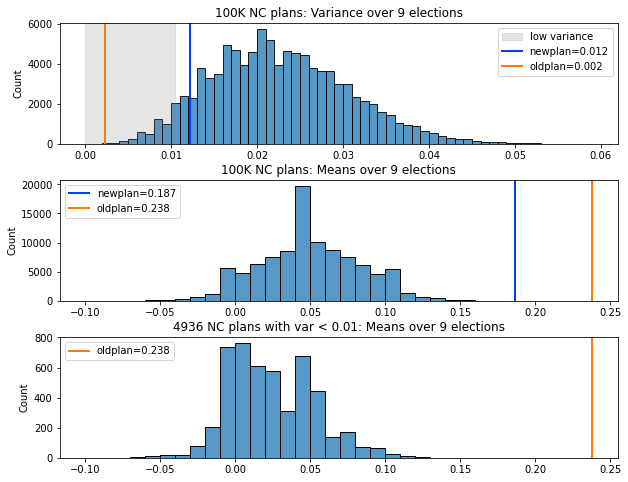

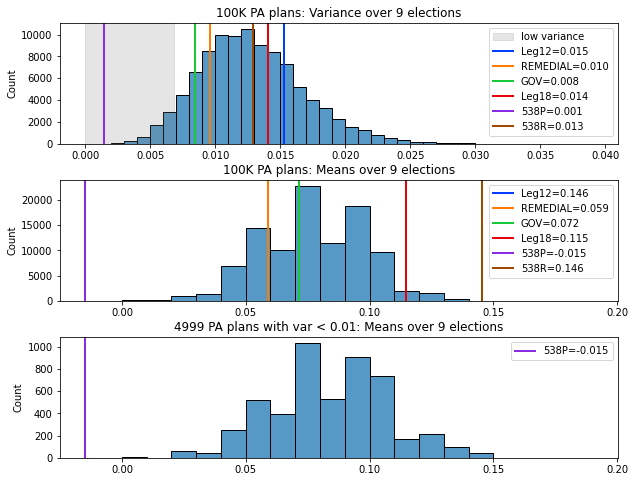

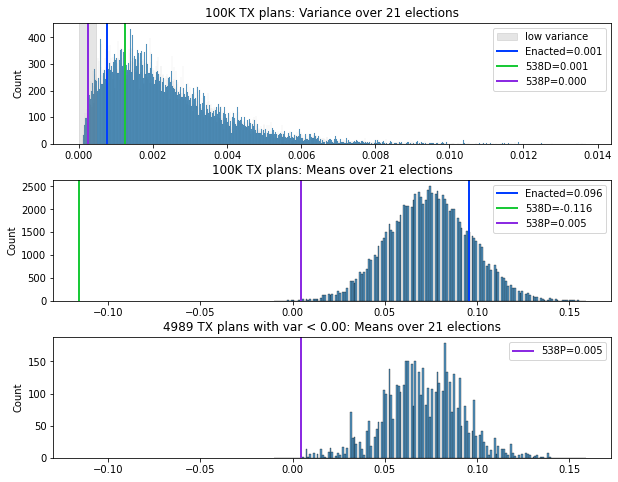

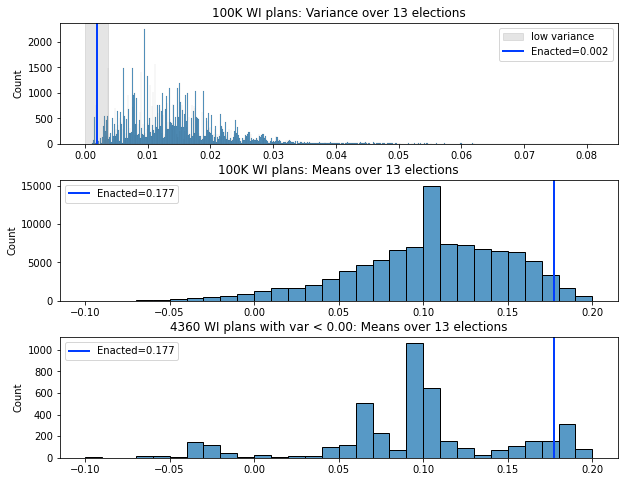

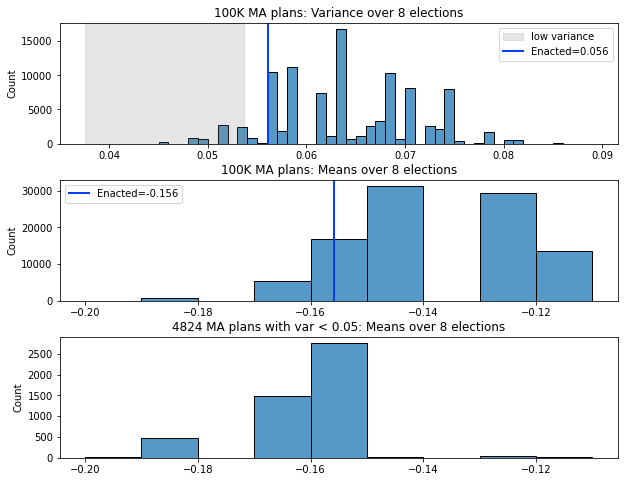

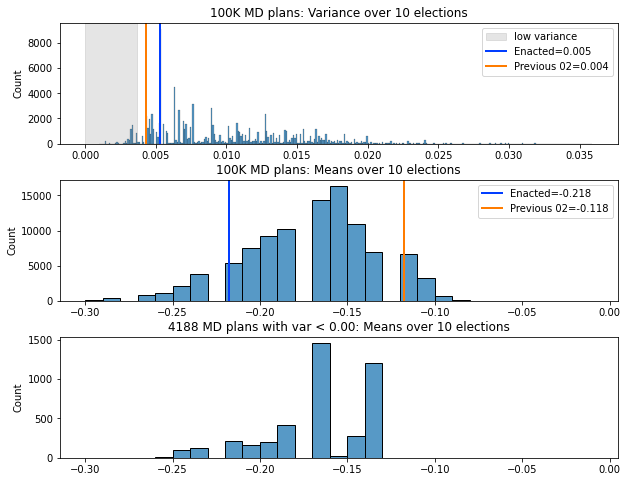

In [10]:
for state in ["NC", "PA", "TX", "WI", "MA", "MD"]:
    make_histogram(state, "proportionality_scores_100000")

Calculating variances and means...


100%|█████████████████████████████████| 100000/100000 [00:32<00:00, 3038.52it/s]


Calculating low-variance means...


100%|█████████████████████████████████████| 4936/4936 [00:00<00:00, 6828.35it/s]


Grabbing enacted stats...


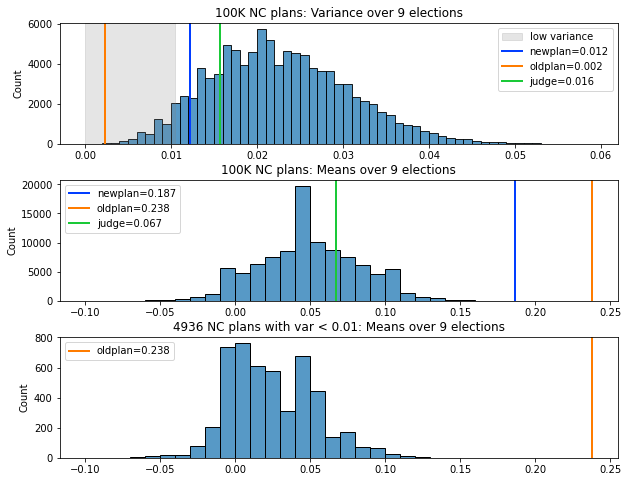

In [11]:
make_histogram("NC", "proportionality_scores_100000")

In [12]:
plans_by_training_score

{0: 652, 1: 4761, 2: 4421, 3: 166, 4: 0}

In [5]:
pickle.load(open(f"outputs/PA/plans_by_training_score_100000.p", "rb"))

{0: 9205, 1: 48993, 2: 40638, 3: 1164, 4: 0}

In [3]:
pickle.load(open(f"outputs/NC/plans_by_training_score_100000.p", "rb"))

{0: 36711, 1: 56123, 2: 6567, 3: 560, 4: 39, 5: 0}

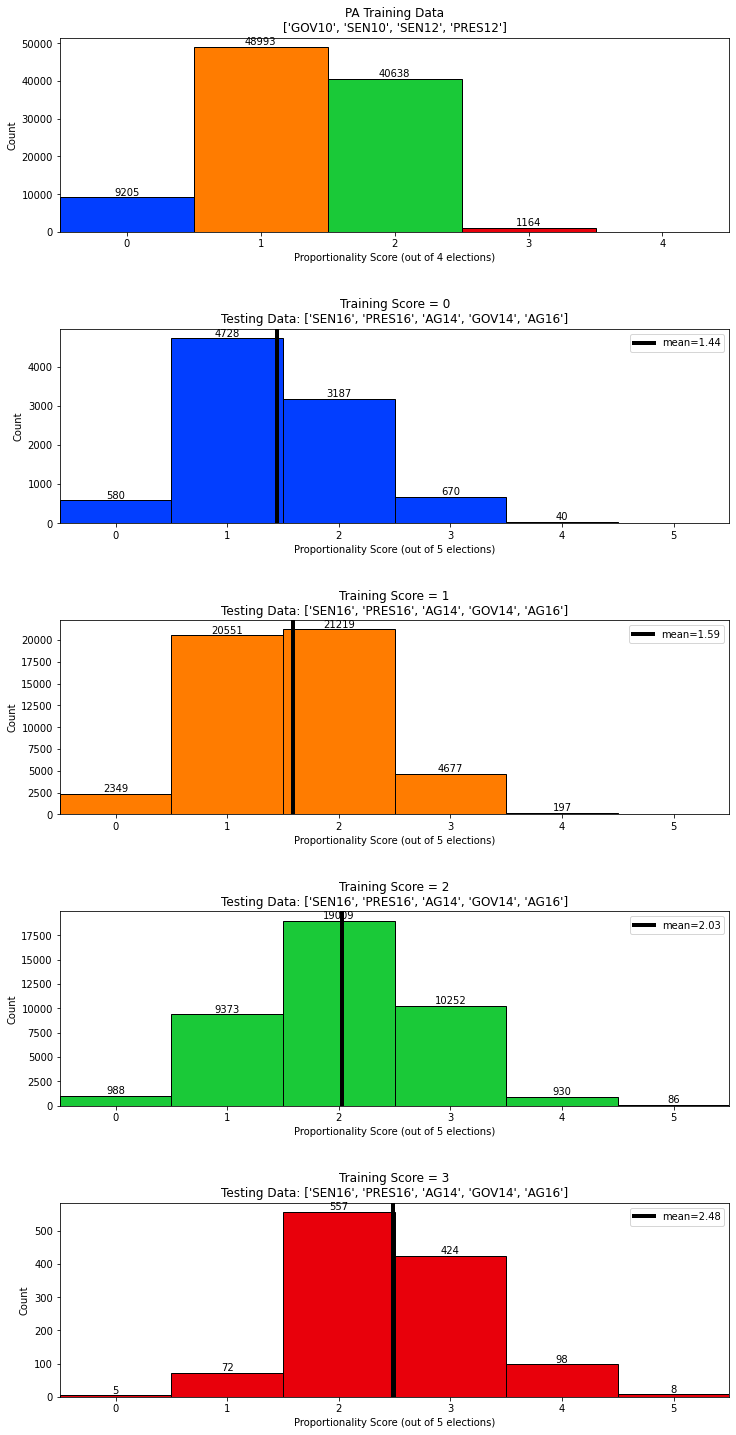

In [6]:
plot_full_score_histogram("PA", 100000)

NC
TX
WI
PA
MD
MA


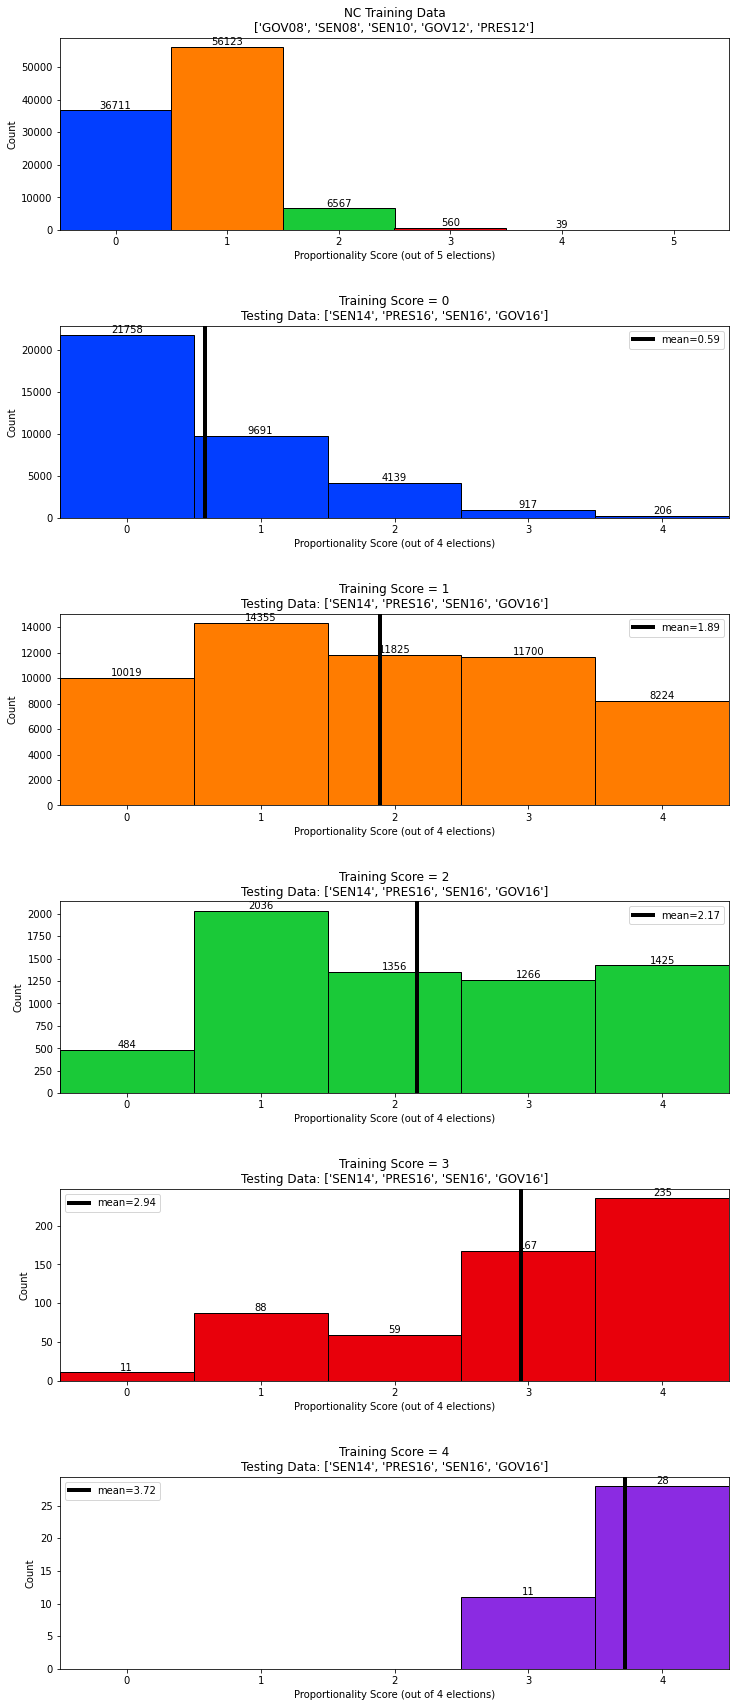

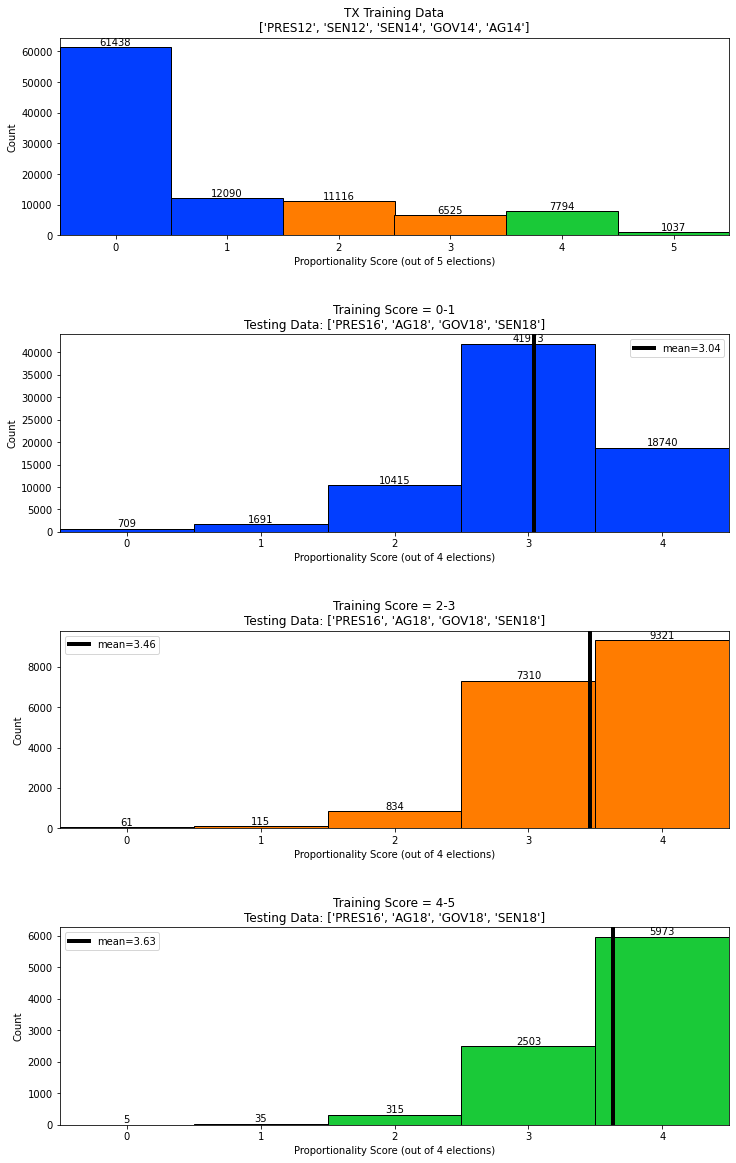

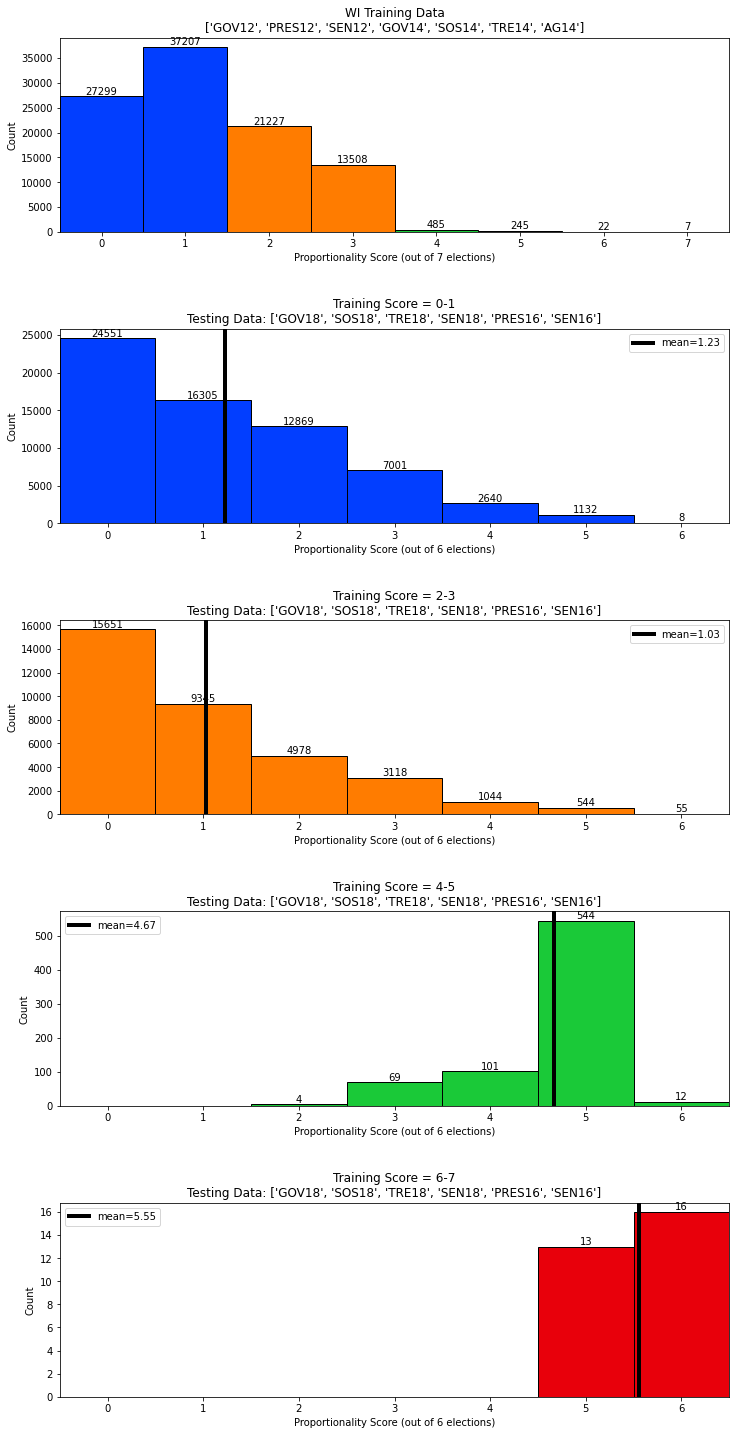

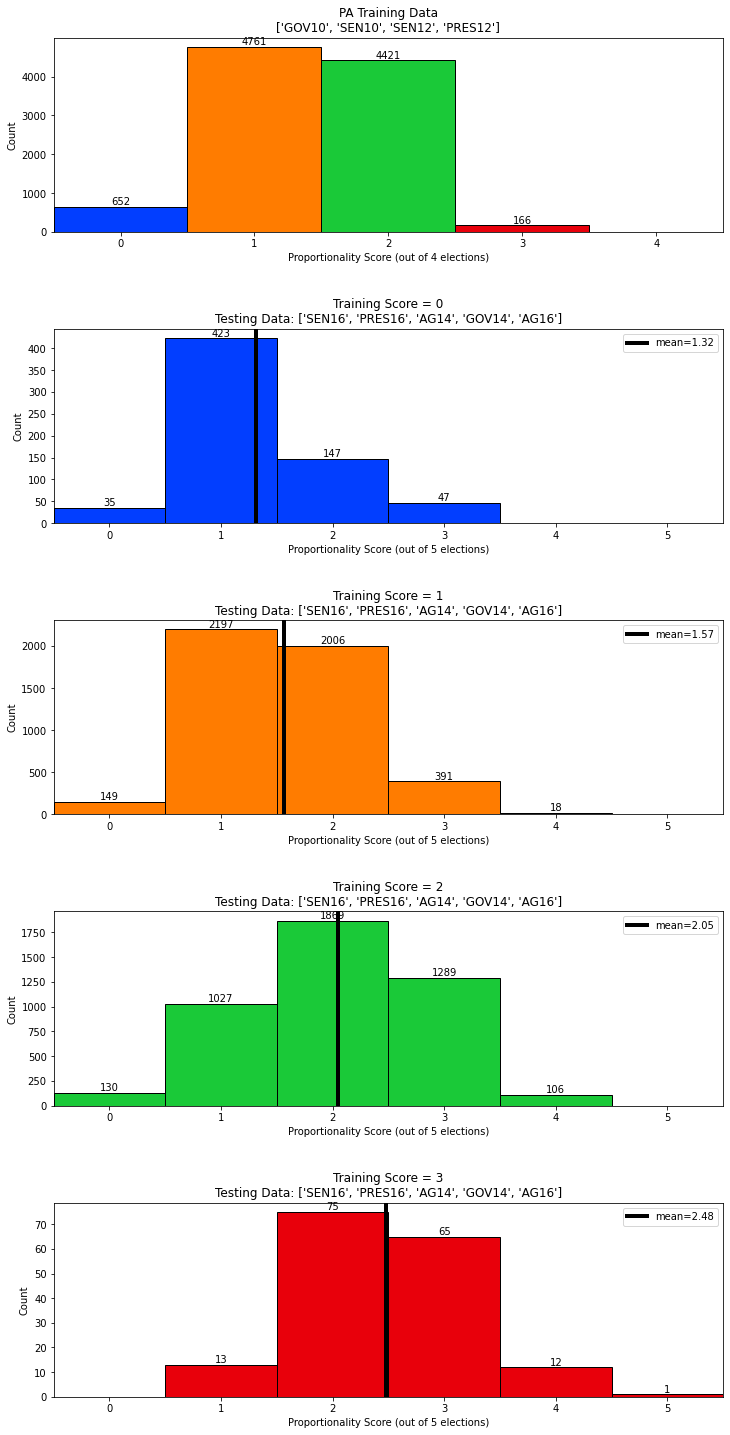

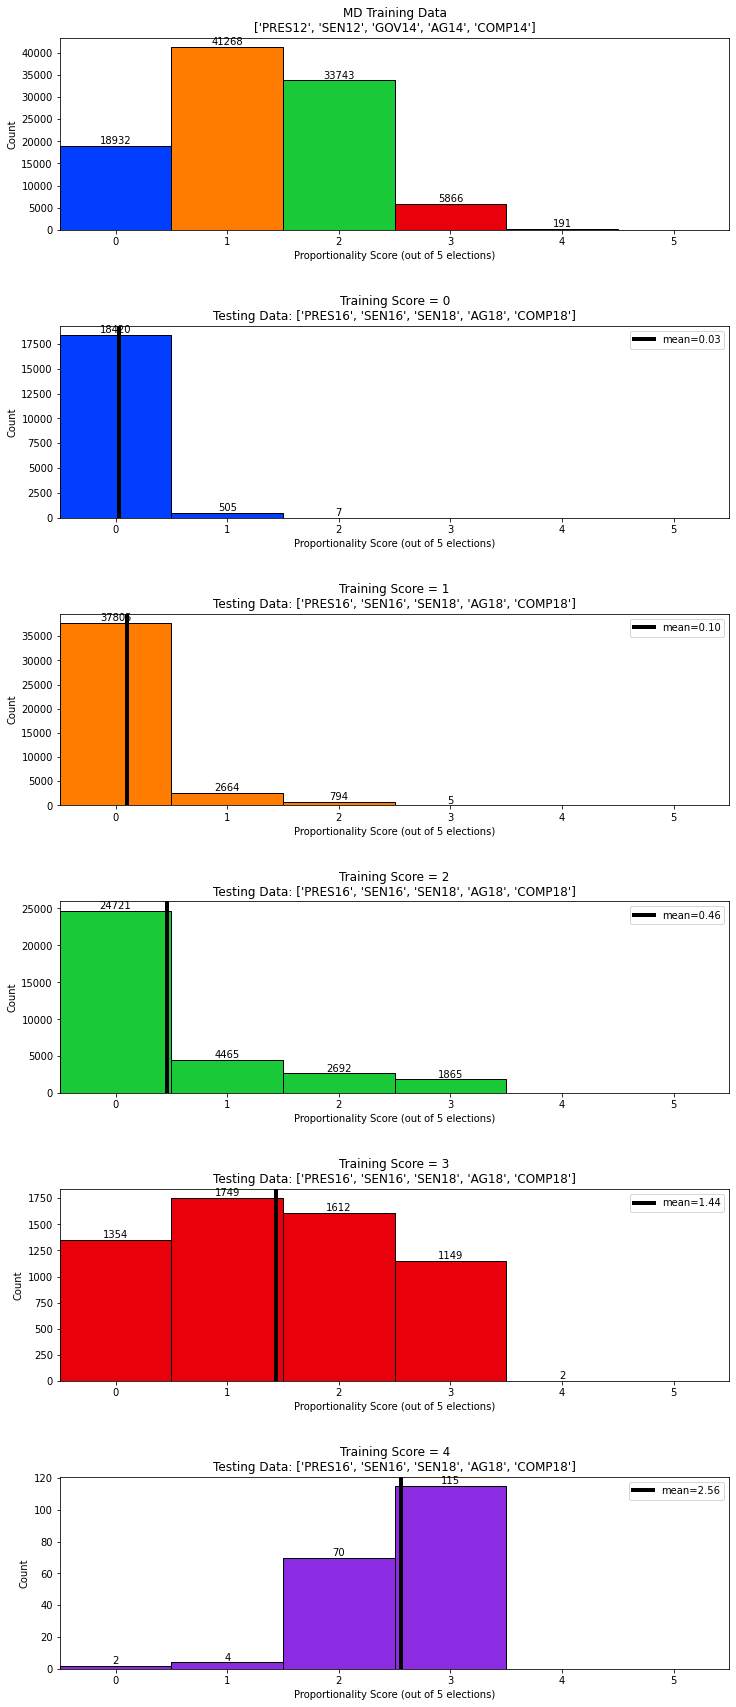

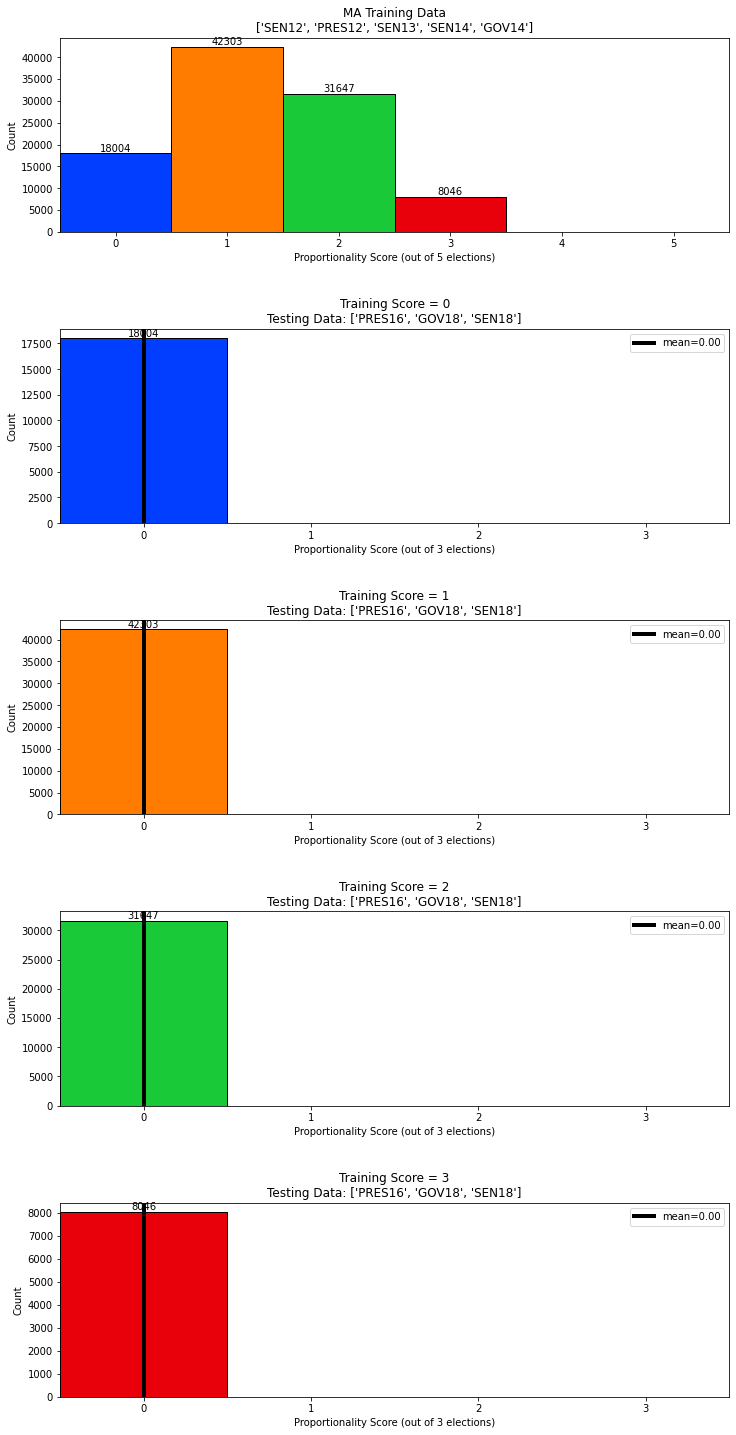

In [3]:
for state in ["NC", "TX", "WI", "PA", "MD", "MA"]:
    print(state)
    plot_full_score_histogram(state, 100000)

In [97]:
def get_pie_values(states_list):
    for state in states_list:
        print(state)
        graph = initialize_graph(state)
        partition = initialize_partition(graph, state)
        threshold = max(0.07, 1/len(partition))
        data_path = f"outputs/{state}/{state}_proportionality_scores_100000.csv"
        past4 = states[state]["past4"]
        df, _ = make_df(data_path)
        df = df[past4]
        plans_by_score = {s:[] for s in range(len(past4)+1)}

        def is_vec_proportional_score(vec, threshold):
            score = 0
            for v in vec:
                if abs(v) <= threshold:
                    score += 1
            return score

        for _, row in df.iterrows():
            score = is_vec_proportional_score(row, threshold)
            plans_by_score[score].append(1)

        sizes = [len(plans_by_score[s])/len(df) for s in plans_by_score]
        print("\\begin{tikzpicture}")
        print("\\pie{",end="")
        for idx, value in enumerate(sizes):
            print(f"{value*100:0.1f}/{idx},", end="")
        print("}\n\\end{tikzpicture}")
        
        # for idx, value in enumerate(sizes):
        #     print(f"  {idx}: {value}")

In [99]:
# correct values
get_pie_values(["NC", "PA", "WI", "MA", "MD", "TX"])

NC
\begin{tikzpicture}
\pie{33.4/0,18.4/1,22.3/2,13.9/3,12.0/4,}
\end{tikzpicture}
PA
\begin{tikzpicture}
\pie{8.1/0,44.2/1,34.6/2,12.5/3,0.6/4,}
\end{tikzpicture}
WI
\begin{tikzpicture}
\pie{1.8/0,15.0/1,40.1/2,22.9/3,20.2/4,}
\end{tikzpicture}
MA
\begin{tikzpicture}
\pie{100.0/0,0.0/1,0.0/2,0.0/3,0.0/4,}
\end{tikzpicture}
MD
\begin{tikzpicture}
\pie{23.0/0,3.8/1,11.8/2,54.2/3,7.3/4,}
\end{tikzpicture}
TX
\begin{tikzpicture}
\pie{1.5/0,11.0/1,59.5/2,26.6/3,1.4/4,}
\end{tikzpicture}


In [78]:
# 0.07 hardcoded
get_pie_values(["NC", "PA", "WI", "MA", "MD", "TX"])

NC


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 28213.60it/s]


  0: 0.33421
  1: 0.18381
  2: 0.22335
  3: 0.13864
  4: 0.11999
PA


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 27868.09it/s]


  0: 0.08129
  1: 0.4424
  2: 0.346
  3: 0.12465
  4: 0.00566
WI


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 28215.20it/s]


  0: 0.46755
  1: 0.37642
  2: 0.1523
  3: 0.00294
  4: 0.00079
MA


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26234.23it/s]


  0: 1.0
  1: 0.0
  2: 0.0
  3: 0.0
  4: 0.0
MD


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26731.49it/s]


  0: 0.8201
  1: 0.08662
  2: 0.033
  3: 0.06026
  4: 2e-05
TX


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26603.20it/s]


  0: 0.01537
  1: 0.10968
  2: 0.59528
  3: 0.26572
  4: 0.01395


In [58]:
state = "NC"
k = 13 # should generalize
elections = list(states[state]["elections"].keys())
plan = states[state]["ENACTED_COL"][0]
df = pd.read_csv(f"outputs/{state}/{state}_proportionality_scores_100000.csv", index_col=0)
for election in elections:
    stats = pd.read_csv(f"outputs/{state}/{state}_{plan}_election_stats.csv", index_col=0)
    vote_share = stats.loc["vote_share"][election]
    ensemble_mean = (k * (df[election] + vote_share)).mean()
    print(f"election: {ensemble_mean:.1f}")

election: 4.3
election: 3.0
election: 10.3
election: 9.7
election: 7.3
election: 7.6
election: 7.8
election: 8.5
election: 7.3


In [55]:
(13 * (df.GOV08 + 0.483)).mean()

4.34963211023207

In [39]:
df

,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16,GOV08_bv,SEN08_bv,SEN10_bv,GOV12_bv,PRES12_bv,SEN14_bv,PRES16_bv,SEN16_bv,GOV16_bv
0,0.055499,-0.072121,0.209060,0.210554,0.258410,0.260883,0.249470,0.239007,0.269703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.055499,-0.072121,0.209060,0.210554,0.258410,0.260883,0.249470,0.239007,0.269703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.021424,-0.072121,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.192780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.021424,0.004802,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.115857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.021424,0.004802,0.132137,0.133631,0.181487,0.183960,0.172547,0.162084,0.115857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.098348,-0.302890,0.285983,0.210554,0.104564,0.107037,0.172547,0.239007,0.115857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,-0.098348,-0.302890,0.285983,0.210554,0.104564,0.107037,0.172547,0.239007,0.192780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,-0.098348,-0.302890,0.285983,0.210554,0.181487,0.183960,0.172547,0.239007,0.192780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,-0.098348,-0.302890,0.285983,0.210554,0.181487,0.183960,0.172547,0.239007,0.192780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
stats = pd.read_csv("outputs/NC/NC_oldplan_election_stats.csv")

In [45]:
13*(0.055499 + 0.483)

7.000487

In [43]:
stats

,stat,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,vote_share,0.483,0.457,0.560,0.559,0.511,0.508,0.520,0.530,0.500
1,propor_seats,0.483,0.457,0.560,0.559,0.511,0.508,0.520,0.530,0.500
2,2propor_seats,6.057,5.375,8.064,8.026,6.781,6.717,7.014,7.286,6.488
3,seats,13.000,13.000,13.000,13.000,13.000,13.000,13.000,13.000,13.000
4,Rseats,8.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
5,Rseat_share,0.615,0.769,0.769,0.769,0.769,0.769,0.769,0.769,0.769
6,disprop,0.132,0.312,0.209,0.211,0.258,0.261,0.249,0.239,0.270


In [34]:
state = "NC"
graph = initialize_graph(state)
plans = states[state]["ENACTED_COL"]
past4 = states[state]["past4"]
df = pd.DataFrame(index=plans, columns=past4 + ["FTV", "Pass?"])
for idx, plan in enumerate(plans):
    partition = initialize_partition(graph, state, idx)
    t = max(0.07, 1/len(partition))
    
    passes = 0
    for election in past4:
        disprop = proportionality_score(partition, election)
        df.loc[plan][election] = disprop
        if disprop < t:
            passes += 1
    df.loc[plan]["FTV"] = passes
    df.loc[plan]["Pass?"] = "Y" if passes >= 3 else "N"

In [35]:
df

,PRES16,PRES12,SEN16,SEN14,FTV,Pass?
newplan,0.24947,0.25841,0.239007,0.260883,0,N
oldplan,0.24947,0.25841,0.239007,0.260883,0,N
judge,0.095624,0.104564,0.162084,0.18396,0,N


In [20]:
ENACTED_COL

'newplan'

In [18]:
partition

<Partition [13 parts]>

In [22]:
df = pd.read_csv("outputs/NC/NC_election_stats.csv")

In [23]:
df

,stat,GOV08,SEN08,SEN10,GOV12,PRES12,SEN14,PRES16,SEN16,GOV16
0,vote_share,0.4830,0.4567,0.5602,0.5587,0.5108,0.5083,0.5198,0.5302,0.4995
1,propor_seats,0.4830,0.4567,0.5602,0.5587,0.5108,0.5083,0.5198,0.5302,0.4995
2,2propor_seats,6.0570,5.3751,8.0644,8.0256,6.7813,6.7170,7.0138,7.2858,6.4877
3,seats,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000
4,seat_share,0.5385,0.3846,0.7692,0.7692,0.7692,0.7692,0.7692,0.7692,0.7692
5,propor_score,0.0555,-0.0721,0.2091,0.2106,0.2584,0.2609,0.2495,0.2390,0.2697


In [7]:
# fig, ax = plt.subplots()
# ax = make_one_pie_chart("NC", ax, 100000, 0.07)
# plt.show()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 27006.52it/s]


AttributeError: 'tuple' object has no attribute 'pie'

In [3]:
def equal_turnout_eg(partition, election):
    seat_share = partition[election].wins("Rep") / len(partition)
    vote_share = partition[election].percent("Rep")
    return 2 * vote_share - seat_share - 0.5

def is_eg_score(partition, elections, threshold=0.07):
    score = 0
    for election in elections:
        if abs(equal_turnout_eg(partition, election)) <= threshold:
            score += 1
    return score

def seats_bounds(partition, election):
    k = len(partition)
    eg_threshold = max(1/k, 0.07)
    vote_share = partition[election].percent("Dem")
    
    minimum_seats = k * (2 * vote_share - eg_threshold - 0.5)
    maximum_seats = k * (2 * vote_share + eg_threshold - 0.5)
    
    return (round(minimum_seats, 1), round(maximum_seats,1))

In [3]:
graph = initialize_graph("NC")

In [4]:
partition = initialize_partition(graph, "NC")

In [5]:
elections = states["NC"]["past4"]

In [11]:
proportionality_score(partition, "PRES16")

0.2494697085411095

In [12]:
partition["PRES16"].wins("Rep")

10

In [13]:
partition["PRES16"].percent("Rep")

0.5197610606896598

In [49]:
equal_turnout_eg(partition, "PRES12")

0.1711757285157286

In [38]:
is_proportional(partition, "PRES16")

False

In [10]:
print("Tracking EG scores:")
for state in sorted(states.keys()):
    if state == "DE" or state == "VT":
        continue
    print(state, end=" ")
    graph = initialize_graph(state)
    partition = initialize_partition(graph, state)
    elections = states[state]["past4"]
    for election in elections:
        print(election, end=": ")
        print(f"{equal_turnout_eg(partition, election)*100:0.2f}", end=", ")
    print(f"Total = {is_eg_score(partition, elections)}")
    print("")
#     score = is_proportional_score(partition, elections)
#     eg_score = is_eg_score(partition, elections)
#     print(f"-> prop: {score}/4 eg: {eg_score}/4")
#     print(f"PRES16 EG: {equal_turnout_eg(partition, 'PRES16')}")
#     break

Tracking EG scores:
MA PRES16: 20.70, PRES12: 26.43, SEN18: 24.96, SEN14: 26.08, Total = 0

MD PRES16: 9.45, PRES12: 10.84, SEN18: 1.17, SEN16: 11.37, Total = 1

ME PRES16: -3.19, SEN18: 4.26, PRES12: 34.28, SEN14: -13.03, Total = 2

MN PRES16: -14.16, SEN18: 25.04, PRES12: 17.12, SEN14: 14.34, Total = 0

NC PRES16: -22.97, PRES12: -24.76, SEN16: -20.88, SEN14: -25.25, Total = 0

NH PRES20: 42.50, SEN20: 33.97, PRES16: -0.39, SEN16: -0.14, Total = 2

PA PRES16: -15.96, PRES12: -27.64, SEN16: -26.35, SEN12: -9.13, Total = 0

TX PRES16: -1.69, PRES12: -3.43, SEN18: -2.96, SEN14: 6.13, Total = 4

WI PRES16: -24.18, PRES12: -19.53, SEN18: -23.34, SEN16: -21.53, Total = 0



In [11]:
# states matching up on PRES16 EG:
# MN yes
# ME yes
# NH yes
# NC no — we say -0.23, they say -0.07
# PA no — we say -0.16, they say -0.48
# WI yes
# MA yes
# MD yes
# TX yes

In [47]:
df = pd.read_excel("shapes/MGGG_states.xlsx")

In [52]:
states = {}
for state in set(df["State"]):
    state_df = df[df["State"] == state]
    enacted = set(state_df["Enacted plans"])
    unit_col = state_df["Unit Column"].iloc[0]
    pop_col = state_df["Population"].iloc[0]
    elections = {}
    past4 = [] if type(state_df["past4"].iloc[0]) == str else None
    for i in range(len(state_df)):
        elec_name = state_df["Election name"].iloc[i]
        past_elec = state_df["past4"].iloc[i]
        dems = state_df["Dem"].iloc[i]
        reps = state_df["Rep"].iloc[i]
        if type(elec_name) == str:
            elections[elec_name] = [dems, reps]
        if type(past_elec) == str:
            past4.append(past_elec)
    
    states[state] = {
        "elections": elections,
        "POP_COL":pop_col,
        "ENACTED_COL":enacted,
        "UNIT_COL":unit_col,
        "past4":past4,
    }

In [69]:
states

{'OH': {'elections': {'PRES16': ['PRES16D', 'PRES16R'],
   'SEN16': ['SEN16D', 'SEN16R']},
  'POP_COL': 'TOTPOP',
  'ENACTED_COL': {'CD', 'HDIST', 'SEND'},
  'UNIT_COL': 'PRECODE',
  'past4': None},
 'OK': {'elections': {'AG18': ['AG18D', 'AG18R'],
   'AUD18': ['AUD18D', 'AUD18R'],
   'GOV18': ['GOV18D', 'GOV18R'],
   'LTGOV18': ['LTGOV18D', 'LTGOV18R'],
   'TRE18': ['TRE18D', 'TRE18R']},
  'POP_COL': 'TOTPOP',
  'ENACTED_COL': {'CD', 'HDIST', 'SEND', nan},
  'UNIT_COL': 'PRECODE',
  'past4': None},
 'IA': {'elections': {'PRES00': ['PRES00D', 'PRES00R'],
   'PRES04': ['PRES04D', 'PRES04R'],
   'PRES08': ['PRES08D', 'PRES08R'],
   'PRES12': ['PRES12D', 'PRES12R'],
   'PRES16': ['PRES16D', 'PRES16R']},
  'POP_COL': 'TOTPOP',
  'ENACTED_COL': {'CD', nan},
  'UNIT_COL': 'GEOID10',
  'past4': None},
 'MI': {'elections': {'PRES16': ['PRES16D', 'PRES16R']},
  'POP_COL': 'TOTPOP',
  'ENACTED_COL': {'CD', 'HDIST', 'SENDIST'},
  'UNIT_COL': 'VTD',
  'past4': None},
 'OR': {'elections': {'GOV18':

In [68]:
for state in states.keys():
    if states[state]["past4"] is not None:
        print(state)

DE
MA
WI
MD
MN
ME
NH
NC
PA
VT


In [4]:
districts = list(partition.parts.keys())
# print(districts)
# print(partition[list(elections)[0]].percents("Rep"))
for i,dist in enumerate(districts):
    print(dist, i)
    party_list = [round(partition[elec].percents("Rep")[i]) for elec in elections]
    pairs = list(combinations(party_list, 2))
    rep_pcts_list = [round(partition[elec].percents("Rep")[i],3) for elec in elections]
    print(party_list)
    print(sum(party_list))
    print(len(pairs))
    break

11.0 0
[0, 0, 1, 1, 1, 1, 1, 1, 1]
7
36


In [7]:
strong_guided = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_10001.csv", index_col=0)
weak_guided = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_100001.csv", index_col=0)

In [10]:
len(strong_guided.drop_duplicates()) / len(strong_guided)

0.0033996600339966003

In [11]:
len(weak_guided.drop_duplicates()) / len(weak_guided)

0.003089969100308997

In [22]:
neutral_df = pd.read_csv("outputs/NC/NC_proportionality_scores_100000.csv")
guided_df = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_100001.csv")
guided_df_noSEN10 = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_no_SEN10_100000.csv")
guided_df_noSEN0810 = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_no_SEN0810_100000.csv")
guided_df_onlySEN0810 = pd.read_csv("outputs/NC/NC_guided_proportionality_scores_only_SEN0810_100000.csv")

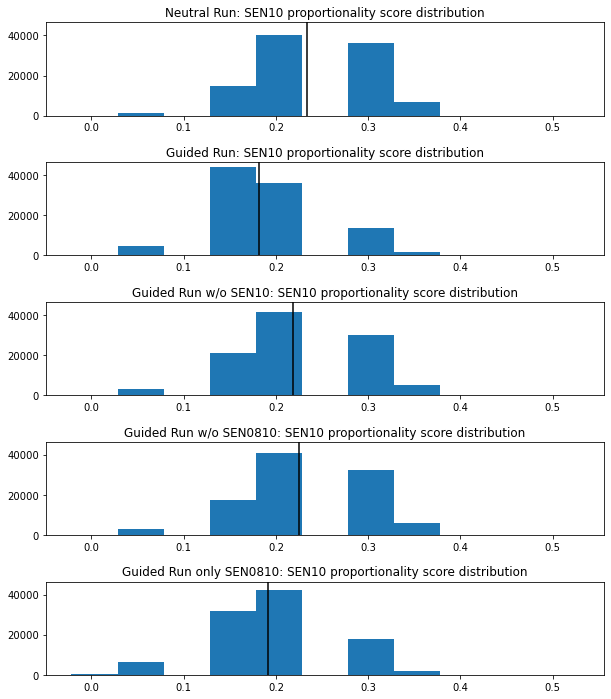

In [23]:
fig, ax = plt.subplots(5, 1, figsize=(10,12), sharex=True, sharey=True)

dfs = [neutral_df, guided_df, guided_df_noSEN10, guided_df_noSEN0810, guided_df_onlySEN0810]
titles = ["Neutral Run", "Guided Run", "Guided Run w/o SEN10", "Guided Run w/o SEN0810", "Guided Run only SEN0810"]
focus_elec = "SEN10"
bins = np.arange(min(dfs[0][focus_elec]), max(dfs[0][focus_elec])+0.1, 0.05)
plt.subplots_adjust(hspace=0.5)
for i in range(5):
    mean = np.mean(dfs[i][focus_elec])
    ax[i].hist(dfs[i][focus_elec], bins=bins)
    ax[i].set_title(f"{titles[i]}: {focus_elec} proportionality score distribution")
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].axvline(x=mean, color="black")

(array([2.0000e+00, 1.5480e+03, 0.0000e+00, 1.5032e+04, 0.0000e+00,
        4.0279e+04, 3.6143e+04, 0.0000e+00, 6.9930e+03, 3.0000e+00]),
 array([-0.02170954,  0.02444431,  0.07059815,  0.116752  ,  0.16290585,
         0.20905969,  0.25521354,  0.30136738,  0.34752123,  0.39367508,
         0.43982892]),
 <a list of 10 Patch objects>)

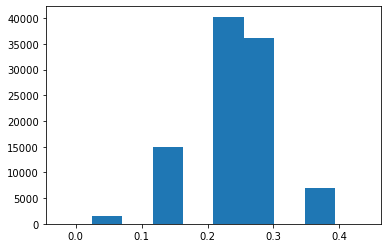

In [46]:
plt.hist(neutral_df["SEN10"])

In [6]:
state = "NC"
graph = initialize_graph(state)
partition = initialize_partition(graph, state)
elections = states[state]["elections"].keys()

In [16]:
for election in elections:
    seats = partition[election].wins("Rep")
    seat_share = seats / len(partition)
    vote_share = partition[election].percent("Rep")
    print(f"{election}:")
    print(f" -- {seats} R seats")
    print(f" -- {seat_share:0.3f} R seat share")
    print(f" -- {vote_share:0.3f} R vote share")
    print(f" -- {seat_share - vote_share:0.3f} proportionality score")

GOV08:
 -- 7 R seats
 -- 0.538 R seat share
 -- 0.483 R vote share
 -- 0.055 proportionality score
SEN08:
 -- 5 R seats
 -- 0.385 R seat share
 -- 0.457 R vote share
 -- -0.072 proportionality score
SEN10:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.560 R vote share
 -- 0.209 proportionality score
GOV12:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.559 R vote share
 -- 0.211 proportionality score
PRES12:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.511 R vote share
 -- 0.258 proportionality score
SEN14:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.508 R vote share
 -- 0.261 proportionality score
PRES16:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.520 R vote share
 -- 0.249 proportionality score
SEN16:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.530 R vote share
 -- 0.239 proportionality score
GOV16:
 -- 10 R seats
 -- 0.769 R seat share
 -- 0.500 R vote share
 -- 0.270 proportionality score


In [14]:
10/13 - 0.520

0.24923076923076926